# Load Required Libraries
Import the necessary libraries such as pandas, NumPy, and Matplotlib for data manipulation and visualization.

# Import Required Libraries
Import the necessary libraries for data analysis and visualization, including pandas, numpy, matplotlib, seaborn, and others.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load and Inspect the Dataset
Load the Sierra Leone dataset into a pandas DataFrame, display the first few rows, and check the dataset's structure, including column names and data types.

### Summary Statistics and Missing Value Report

In this section, we will generate summary statistics, calculate missing values, and identify columns with more than 5% null values.

### Detect and Clean Outliers

In this section, we will identify and handle outliers in key columns (GHI, DNI, DHI, ModA, ModB, WS, WSgust) using Z-scores.

In [6]:
# Define columns to check for outliers
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores and filter outliers
z_scores = df[columns_to_check].apply(zscore)
outliers = (z_scores.abs() > 3)

# Display the number of outliers per column
outlier_counts = outliers.sum()
print("Outliers per column:")
print(outlier_counts)

# Remove rows with outliers
df_cleaned = df[~outliers.any(axis=1)]

# Display the shape of the cleaned dataset
print("\nShape of the cleaned dataset:")
print(df_cleaned.shape)

Outliers per column:
GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

Shape of the cleaned dataset:
(509308, 19)


### Export Cleaned Dataset

In this section, we will save the cleaned DataFrame to a CSV file for further analysis.

In [7]:
# Export the cleaned dataset to a CSV file
output_path = '../src/data/sierraleone_clean.csv'
df_cleaned.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

Cleaned dataset saved to ../src/data/sierraleone_clean.csv


### Perform Time Series Analysis

In this section, we will create line or bar charts for GHI, DNI, DHI, and Tamb vs. Timestamp to observe patterns and anomalies in the Sierra Leone dataset.

C:\Users\Kaleb\AppData\Local\Temp\ipykernel_12308\708942143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])


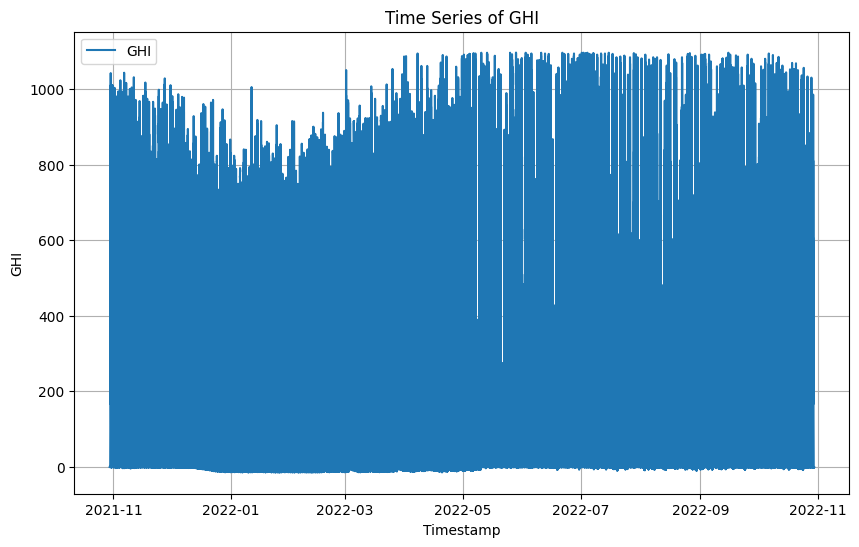

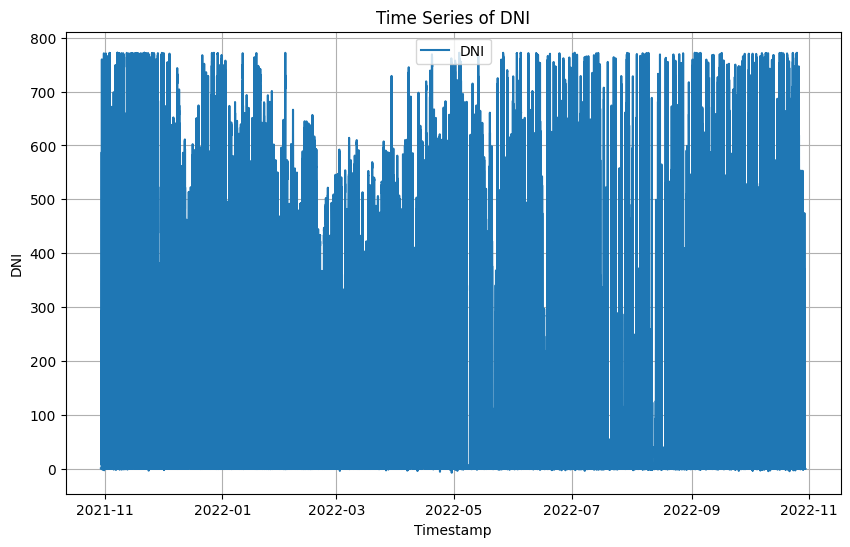

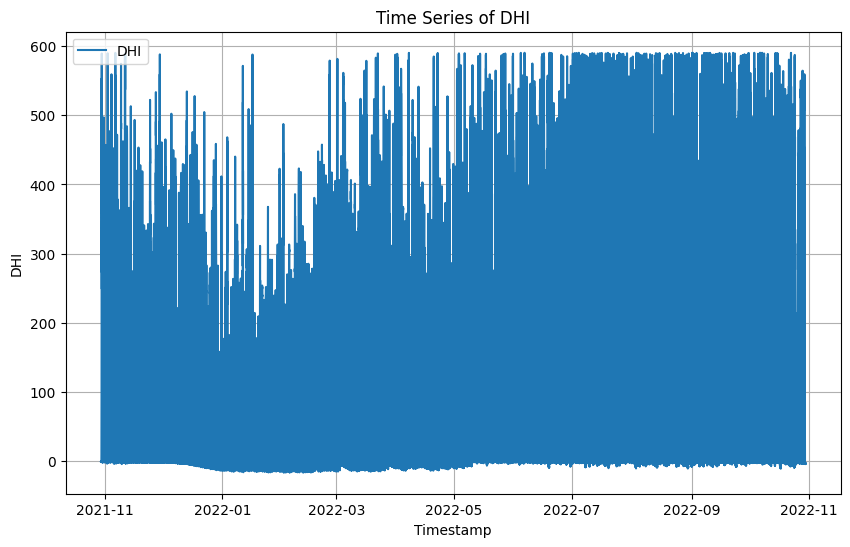

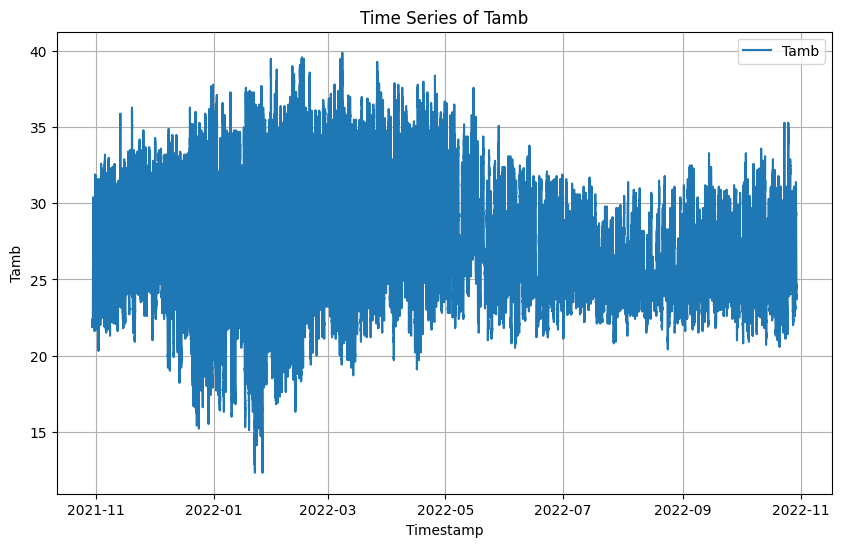

In [8]:
# Ensure the Timestamp column is in datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])

# Plot time series for GHI, DNI, DHI, and Tamb
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df_cleaned['Timestamp'], df_cleaned[column], label=column)
    plt.title(f"Time Series of {column}")
    plt.xlabel("Timestamp")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

### Analyze Cleaning Impact

In this section, we will group by the Cleaning flag and plot average ModA & ModB pre/post-clean for the Sierra Leone dataset.

Average ModA and ModB pre/post-clean:
                     ModA        ModB
Cleaning_Flag                        
False          734.298355  711.448607
True           189.764194  181.693908


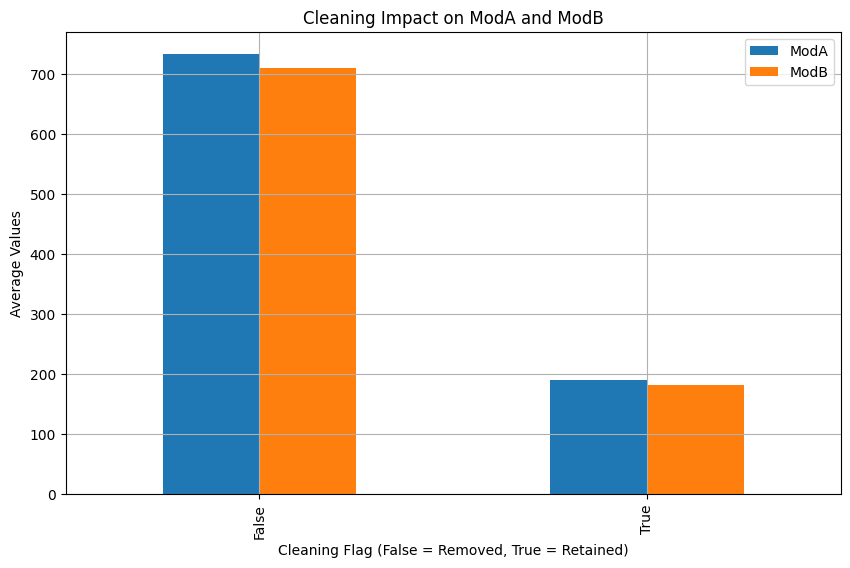

In [9]:
# Add a Cleaning flag column to indicate rows removed during cleaning
df['Cleaning_Flag'] = ~outliers.any(axis=1)

# Group by Cleaning flag and calculate average ModA and ModB
cleaning_impact = df.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean()
print("Average ModA and ModB pre/post-clean:")
print(cleaning_impact)

# Plot the cleaning impact
cleaning_impact.plot(kind='bar', figsize=(10, 6))
plt.title("Cleaning Impact on ModA and ModB")
plt.xlabel("Cleaning Flag (False = Removed, True = Retained)")
plt.ylabel("Average Values")
plt.grid()
plt.show()

### Perform Correlation and Relationship Analysis

In this section, we will generate a heatmap of correlations and scatter plots for key relationships (e.g., WS vs. GHI, RH vs. Tamb) in the Sierra Leone dataset.

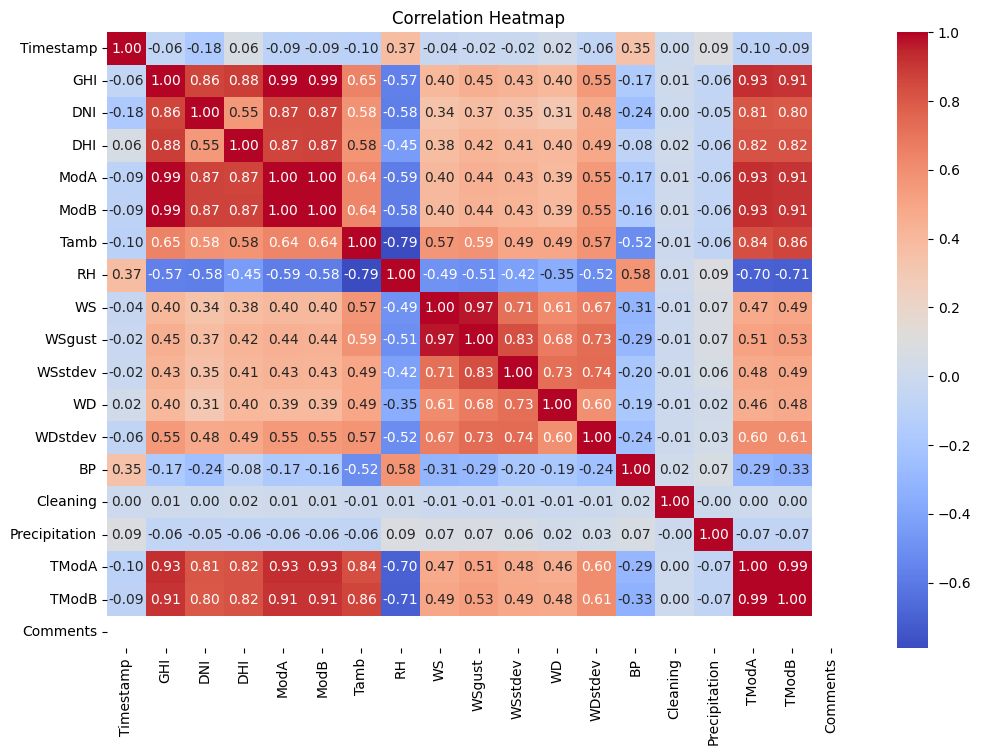

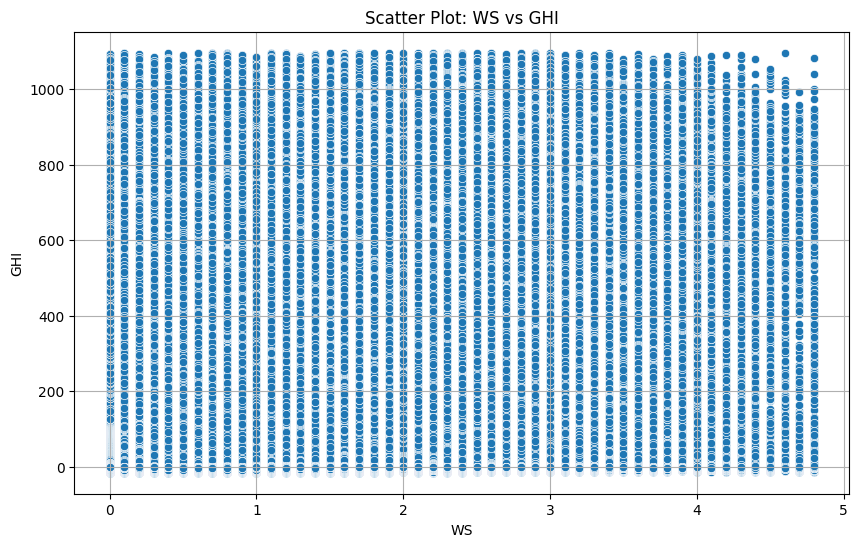

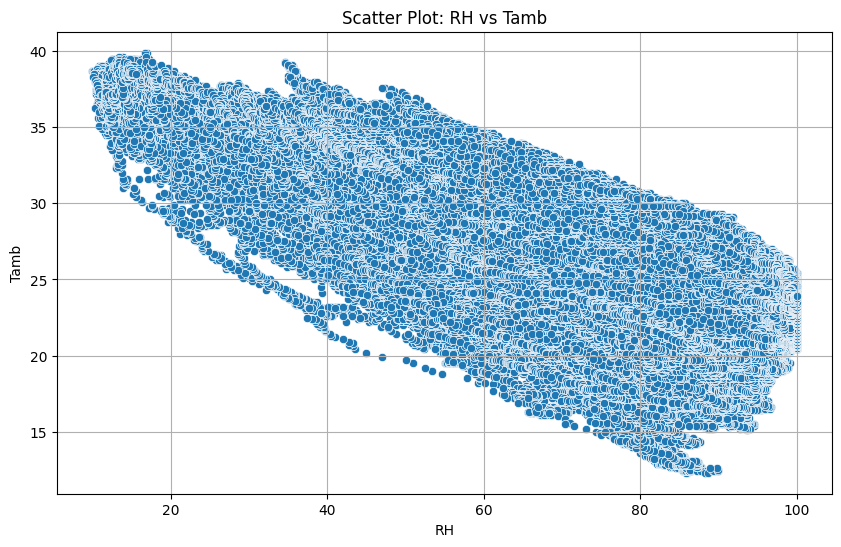

In [10]:
# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for key relationships
scatter_pairs = [('WS', 'GHI'), ('RH', 'Tamb')]
for x, y in scatter_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x=x, y=y)
    plt.title(f"Scatter Plot: {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    plt.show()

### Analyze Wind and Distribution

In this section, we will create wind rose or radial bar plots for WS/WD and histograms for GHI and another variable in the Sierra Leone dataset.

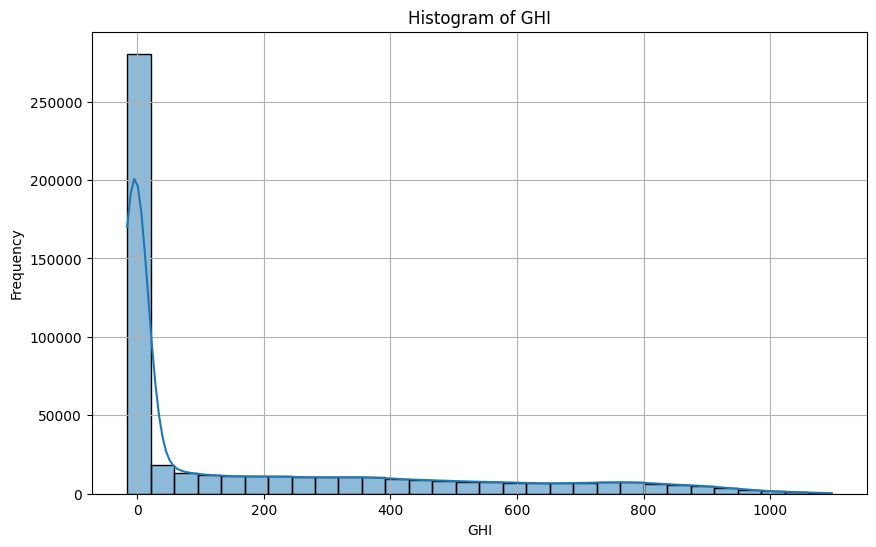

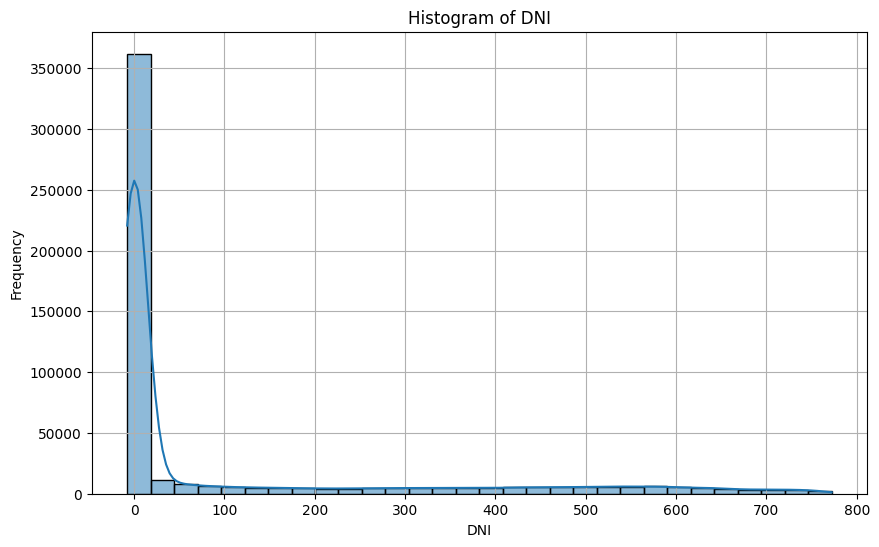

<Figure size 800x800 with 0 Axes>

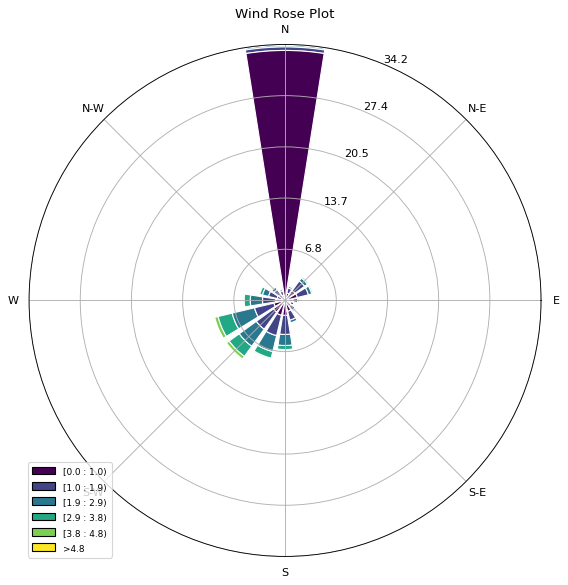

In [11]:
# Create histograms for GHI and another variable
variables_to_plot = ['GHI', 'DNI']
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned[variable], kde=True, bins=30)
    plt.title(f"Histogram of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

# Create a wind rose plot for WS and WD
from windrose import WindroseAxes

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_cleaned['WD'], df_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose Plot")
plt.show()

### Perform Temperature Analysis

In this section, we will examine how relative humidity (RH) influences temperature readings and solar radiation in the Sierra Leone dataset.

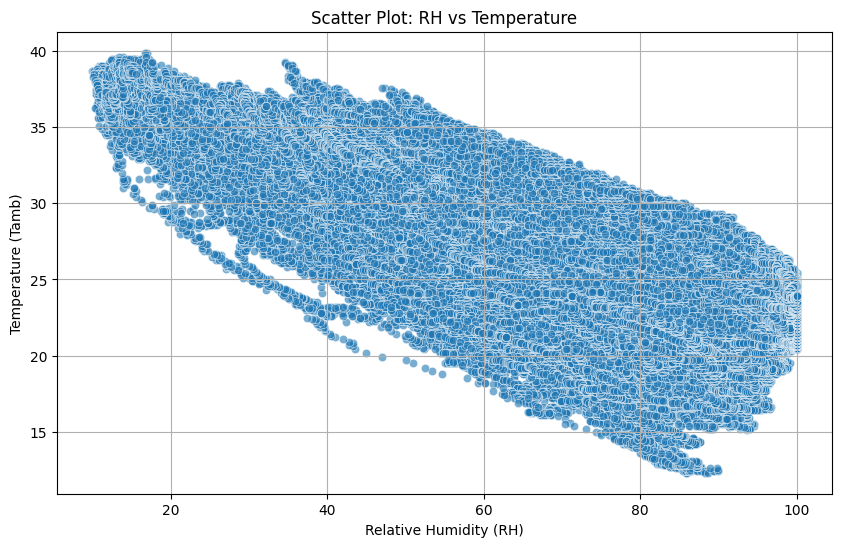

Average GHI by RH ranges:
RH
0-20      633.408607
20-40     495.932672
40-60     397.059365
60-80     304.629103
80-100     66.504192
Name: GHI, dtype: float64


C:\Users\Kaleb\AppData\Local\Temp\ipykernel_12308\2010328409.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ghi_by_rh = df_cleaned.groupby(rh_bins)['GHI'].mean()


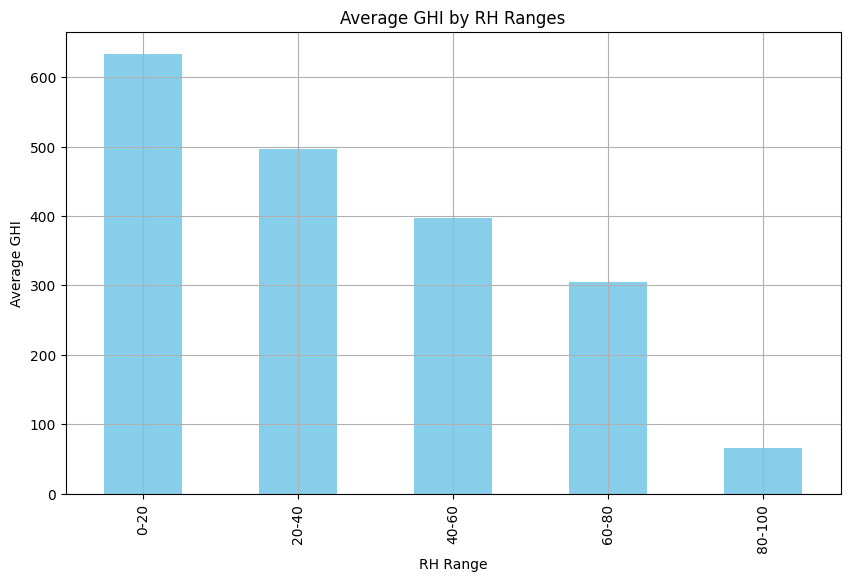

In [12]:
# Analyze the relationship between RH and temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='RH', y='Tamb', alpha=0.6)
plt.title("Scatter Plot: RH vs Temperature")
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("Temperature (Tamb)")
plt.grid()
plt.show()

# Group by RH ranges and calculate average GHI
rh_bins = pd.cut(df_cleaned['RH'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
average_ghi_by_rh = df_cleaned.groupby(rh_bins)['GHI'].mean()
print("Average GHI by RH ranges:")
print(average_ghi_by_rh)

# Plot average GHI by RH ranges
average_ghi_by_rh.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average GHI by RH Ranges")
plt.xlabel("RH Range")
plt.ylabel("Average GHI")
plt.grid()
plt.show()

In [5]:
# Generate summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Identify columns with more than 5% null values
columns_with_nulls = missing_percentage[missing_percentage > 5]
print("\nMissing Values (Count):")
print(missing_values)
print("\nMissing Values (Percentage):")
print(missing_percentage)
print("\nColumns with >5% Null Values:")
print(columns_with_nulls)

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0

In [4]:
# Load the dataset
file_path = '../src/data/sierraleone-bumbuna.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check the structure of the dataset
print(df.info())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.frame.

In [ ]:
# Bubble Chart: GHI vs. Tamb with bubble size representing RH
import matplotlib.pyplot as plt

# Define variables for the bubble chart
x = df_cleaned['Tamb']  # Temperature
y = df_cleaned['GHI']   # Global Horizontal Irradiance
bubble_size = df_cleaned['RH']  # Relative Humidity

# Create the bubble chart
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=bubble_size, alpha=0.6, c=bubble_size, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Relative Humidity (%)')
plt.title('Bubble Chart: GHI vs. Tamb with Bubble Size Representing RH')
plt.xlabel('Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.grid(True)
plt.show()